In [1]:
import pybamm as pb;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
import scipy.optimize
import random;import time, signal
import sys  
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip\Rio_Code\Fun_P2"))
sys.path.append(str_path_1) 
from Fun_P2 import * 

In [2]:
fs=17;
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [ ]:
# write excel results if not yet finish:
BasicPath = 'D:/OneDrive - Imperial College London/SimDataSave/P2_R8_FromSimon/Round_230307/';
Target='Exp5_Scan0_936cyc/';
book_name_xlsx = 'Exp5_Scan0_936cyc.xlsx';
sheet_name_xlsx = 'Results';
index_list = np.arange(1,24+1,1)
Index_List_succeed = index_list
for index_i in Index_List_succeed:
    #print(index_i)
    try:
        old_book = str(index_i) + '_' + book_name_xlsx
        #print(old_book)
        #open excel:
        data_old = openpyxl.load_workbook(BasicPath + Target + old_book)   
        data_tar = openpyxl.load_workbook(BasicPath + Target + book_name_xlsx) 

        table_old = data_old[str(index_i)]
        nrows_old = table_old.max_row  # 获得行数
        ncolumns_old = table_old.max_column  # 获得列数


        table_tar = data_tar[sheet_name_xlsx]
        nrows_tar = index_i # Mark!!! Most important changes!
        ncolumns_old = table_old.max_column  # 获得列数
        list_old = [];
        #print(nrows_old,nrows_tar)
        for i in range(1,nrows_old+1):
            for j in range(1,ncolumns_old+1):
                list_old.append(table_old.cell(row=i,column=j).value)
        
        list_old = [list_old,]
        for i in range(1, len(list_old)+1):
                for j in range(1, len(list_old[i-1])+1):
                    #print(i,j,list_old[i-1][j-1]    )
                    table_tar.cell(nrows_tar+i, j).value = list_old[i-1][j-1]     
        data_tar.save(BasicPath + Target + book_name_xlsx) 
        data_tar.close()
    except:
        print(f"Something goes wrong for Scan {index_i}!")
    else:
        print(f"Successfuly write results for Scan {index_i}!") 


In [3]:
# Reload all scans in this round! 
BasicPath = 'D:/OneDrive - Imperial College London/SimDataSave/P2_R8_FromSimon/Round_230307/'
# Initialize the big dict:
Targets = [
    "Exp1_Scan0_LandsCon_3072","Exp2_Scan0_6192cyc",
    "Exp3_Scan0_6180cyc","Exp5_Scan0_936cyc",]
Scan_Num = [24,24,24,24]
GEM2_Round_230307 = {}
for target,scan_num in zip(Targets,Scan_Num):
    GEM2_Round_230307[target] = {}
    Scans = np.arange(1,scan_num+1,1).tolist()
    for scan in Scans:
        GEM2_Round_230307[target][str(scan)]={}
        try:
            GEM2_Round_230307[target][str(scan)] = loadmat( 
            BasicPath  +   target+ "/" + str(scan) + "/" 
            + str(scan)+ "-StructDara_for_Mat.mat")
        except:
            print(f"Nothing in {target}, Scan {scan}")

Nothing in Exp2_Scan0_6192cyc, Scan 6
Nothing in Exp3_Scan0_6180cyc, Scan 5
Nothing in Exp3_Scan0_6180cyc, Scan 10
Nothing in Exp3_Scan0_6180cyc, Scan 16
Nothing in Exp5_Scan0_936cyc, Scan 24


In [ ]:
# define global index and dict for all experiment data - include reading!
Exp_Path = [
    "Expt 1 - Si-based Degradation/",
    "Expt 2,2 - C-based Degradation 2/",
    "Expt 3 - Cathode Degradation and Li-Plating/",
    "Expt 4 - Drive Cycle Aging (Control)/",
    "Expt 5 - Standard Cycle Aging (Control)/",]
Exp_head = [
    "Expt 1",
    "Expt 2,2",
    "Expt 3",
    "Expt 4",
    "Expt 5",]
Exp_1_Cell = ["A","B","J","D","E","F","K","L","M"];
Exp_1_Temp = {
    "A":"10","B":"10","J":"10",
    "D":"25","E":"25","F":"25",
    "K":"40","L":"40","M":"40",}
Temp_Cell_Exp_1 = {
    "10":["A","B","J"],
    "25":["D","E","F"],
    "40":["K","L","M"],}
Exp_2_Cell = ["A","B","C","D","E","F"];
Exp_2_Temp = {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",}
Temp_Cell_Exp_2 = {
    "10":["A","B"],
    "25":["C","D"],
    "40":["E","F"],}
Exp_3_Cell = ["A","B","C","D","E","F","G","H","I"];
Exp_3_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25","F":"25",
    "G":"40","H":"40","I":"40"}
Temp_Cell_Exp_3 = {
    "10":["A","B","C"],
    "25":["D","E","F"],
    "40":["G","H","I"],}
Exp_4_Cell = ["A","B","C","D","E","F","G","H"];
Exp_4_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_4 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_5_Cell = ["A","B","C","D","E","F","G","H"];
Exp_5_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_5 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_All_Cell  = [Exp_1_Cell,Exp_2_Cell,Exp_3_Cell,Exp_4_Cell,Exp_5_Cell]
Exp_Temp_Cell = [Exp_1_Temp,Exp_2_Temp,Exp_3_Temp,Exp_4_Temp,Exp_5_Temp]
Temp_Cell_Exp_All = [Temp_Cell_Exp_1,Temp_Cell_Exp_2,Temp_Cell_Exp_3,Temp_Cell_Exp_4,Temp_Cell_Exp_5]
Mark_Cell_All = [
    {
    "A":"o","B":">","J":"v",
    "D":"o","E":">","F":"v",
    "K":"o","L":">","M":"v",},
    {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">","F":"v",
    "G":"o","H":">","I":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",}]
Color_Cell_All = [
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"J":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "K":[1,0,0,0.4],"L":[1,0,0,0.4],"M":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"C":[0, 0, 0,0.7],
    "E":[1,0,0,0.4],"F":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "G":[1,0,0,0.4],"H":[1,0,0,0.4],"I":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],}]
# Global path 
Path_NiallDMA = "D:/OneDrive - Imperial College London/SimDataSave/InputData/"

Finish reading Experiment!


In [66]:
def Plot_CycRPT_Scans(Round,target,index_exp,Temper_i,Scans,BasicPath,colormap,fs,  dpi,Save,Plot_Exp):
    #index_exp = 1  # index for experiment set, range from 1~5
    Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] # select a cell list through temperature
    Exp_Any_AllData = Read_Exp(
        Path_NiallDMA,Exp_All_Cell[index_exp-1],Exp_Path,Exp_head,Exp_Temp_Cell[index_exp-1],index_exp-1)
    color_exp = [0, 0, 0,0.7]; marker_exp = "v";
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(Temper_i))]
    font = {'family' : 'DejaVu Sans','size': fs}
    mpl.rc('font', **font)
    Num_subplot = 4;
    cmap = mpl.cm.get_cmap(colormap, len(Scans)) 
    fig, axs = plt.subplots(Num_subplot,1, figsize=(6,10),tight_layout=True)
    for i,scan in enumerate(Scans):
        axs[0].plot(
            Round[target][str(scan)]["Throughput capacity [kA.h]"][0],
            Round[target][str(scan)]["CDend SOH [%]"][0],
            '-o', color=cmap(i), label= str(scan))
        axs[1].plot(
            Round[target][str(scan)]["Throughput capacity [kA.h]"][0],
            Round[target][str(scan)]["CDend LLI lithium plating [%]"][0]
            +Round[target][str(scan)]["CDend LLI SEI [%]"][0]
            +Round[target][str(scan)]["CDend LLI SEI on cracks [%]"][0],
            '-o', color=cmap(i), label= str(scan))
        axs[2].plot(
            Round[target][str(scan)]["Throughput capacity [kA.h]"][0],
            Round[target][str(scan)]["CDend LAM_ne [%]"][0]
            -Round[target][str(scan)]["CDend LAM_ne [%]"][0][0],
            '-o', color=cmap(i), )
        axs[3].plot(
            Round[target][str(scan)]["Throughput capacity [kA.h]"][0],
            Round[target][str(scan)]["CDend LAM_pe [%]"][0]
            -Round[target][str(scan)]["CDend LAM_pe [%]"][0][0],
            '-o', color=cmap(i), )
    if Plot_Exp == True:
        for cell in Exp_temp_i_cell:
            axs[0].plot(
                np.array(Exp_Any_AllData[cell]["Extract Data"]["Charge Throughput (A.h)"])/1e3,
                np.array(Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]["SoH"])*100,
                color=color_exp,marker=marker_exp,label=f"Cell {cell}") 
            axs[1].plot(
                np.array(Exp_Any_AllData[cell]["Extract Data"]["Charge Throughput (A.h)"])/1e3,
                np.array(Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]["LLI"])*100,
                color=color_exp,marker=marker_exp,label=f"Cell {cell}")  
            axs[2].plot(
                np.array(Exp_Any_AllData[cell]["Extract Data"]["Charge Throughput (A.h)"])/1e3,
                np.array(Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]["LAM NE_tot"])*100,
                color=color_exp,marker=marker_exp, )
            axs[3].plot(
                np.array(Exp_Any_AllData[cell]["Extract Data"]["Charge Throughput (A.h)"])/1e3,
                np.array(Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]["LAM PE"])*100,
                color=color_exp,marker=marker_exp,)
    axs[0].set_ylabel("SOH %")
    axs[1].set_ylabel("LLI %")
    axs[2].set_ylabel("LAM NE %")
    axs[3].set_ylabel("LAM PE %")
    #axs[4].set_ylabel(r"Lump resistance [m$\Omega$]")
    axs[3].set_xlabel("Charge Throughput (kA.h)")
    for i in range(0,Num_subplot):
        labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); [label.set_fontname('DejaVu Sans') for label in labels]
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
    #axs[4].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    axs[0].legend(
        prop={'family':'DejaVu Sans','size':fs-3},ncol=2,
        frameon=False,markerscale=1,borderpad=0.2,
        handlelength=1.5,columnspacing=1)
    #axs[1,1].legend(prop={'family':'DejaVu Sans','size':fs-4},loc='best',frameon=False)
    fig.suptitle(
        f"Exp-{str(index_exp)} - {str(int(Temper_i))}"+r"$^\circ$C - Summary", fontsize=fs)
    if Save == True:
        plt.savefig(
            BasicPath + target+ "/" +  target
            + f" T={Temper_i}_Cap_fit_Exp_scan.png", dpi=dpi)

Finish reading Experiment!


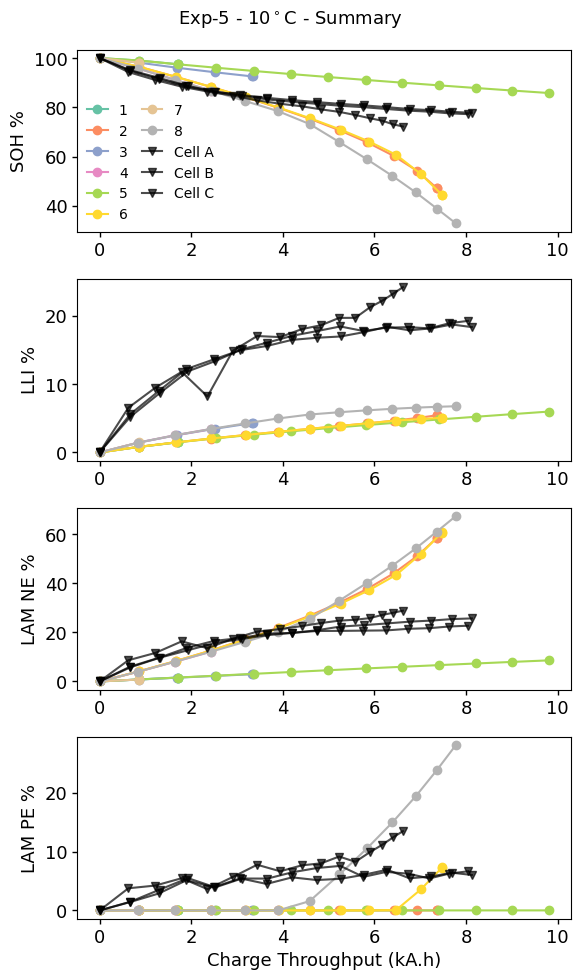

In [81]:
target = "Exp5_Scan0_936cyc";index_exp=5;
Temper_i=10;Scans = np.arange(1,8+1,1).tolist() ; 
dpi=300;fs=13;Save=True;Plot_Exp=True;colormap='Set2'
Plot_CycRPT_Scans(
    GEM2_Round_230307,target,index_exp,Temper_i,Scans,
    BasicPath,colormap,fs,  dpi,Save,Plot_Exp)

Finish reading Experiment!


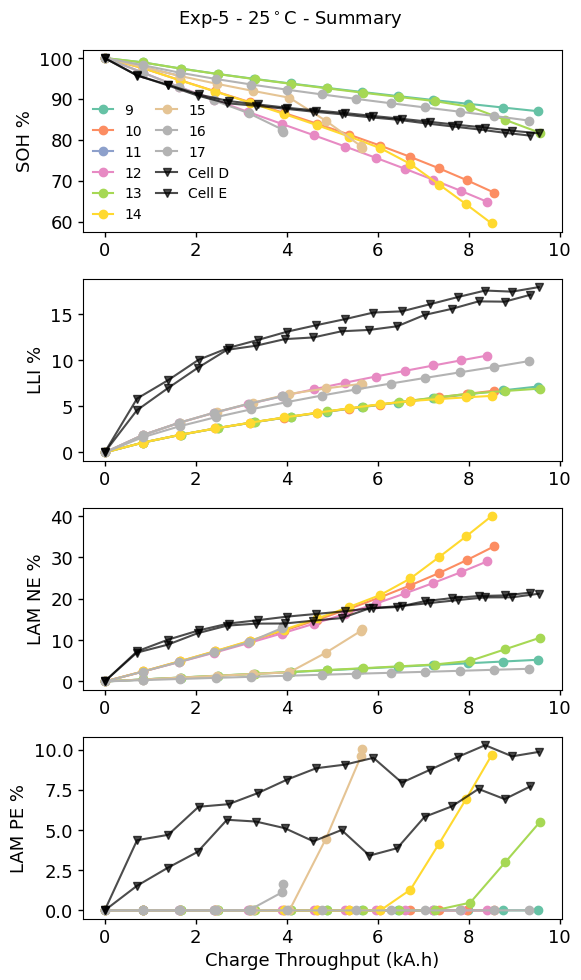

In [82]:
target = "Exp5_Scan0_936cyc";index_exp=5;
Temper_i=25;Scans = np.arange(9,17+1,1).tolist() ; 
dpi=300;fs=13;Save=True;Plot_Exp=True;colormap='Set2'
Plot_CycRPT_Scans(
    GEM2_Round_230307,target,index_exp,Temper_i,Scans,
    BasicPath,colormap,fs,  dpi,Save,Plot_Exp)

Finish reading Experiment!


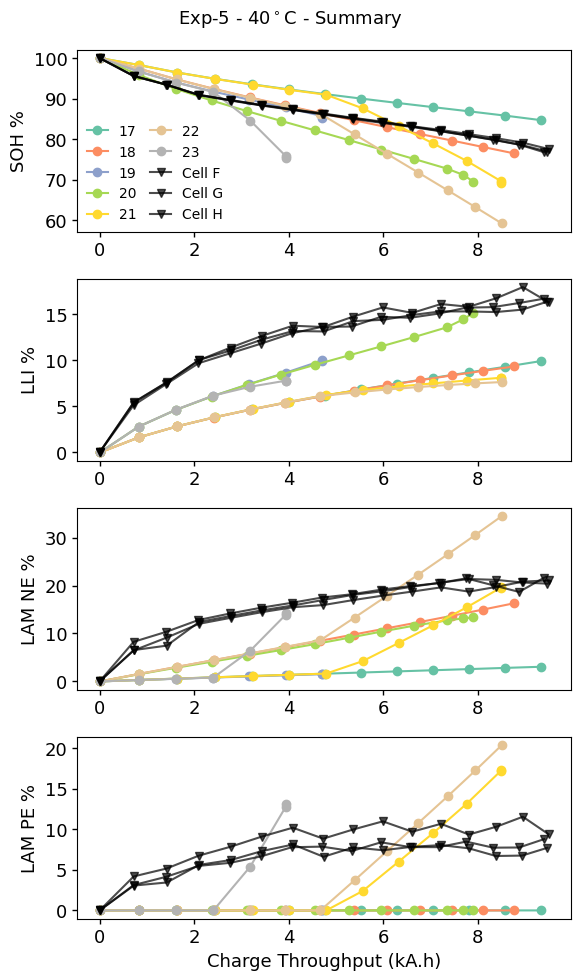

In [83]:
target = "Exp5_Scan0_936cyc";index_exp=5;
Temper_i=40;Scans = np.arange(17,24+1,1).tolist() ;  Scans.remove(24)
dpi=300;fs=13;Save=True;Plot_Exp=True;colormap='Set2'
Plot_CycRPT_Scans(
    GEM2_Round_230307,target,index_exp,Temper_i,Scans,
    BasicPath,colormap,fs,  dpi,Save,Plot_Exp)

Finish reading Experiment!


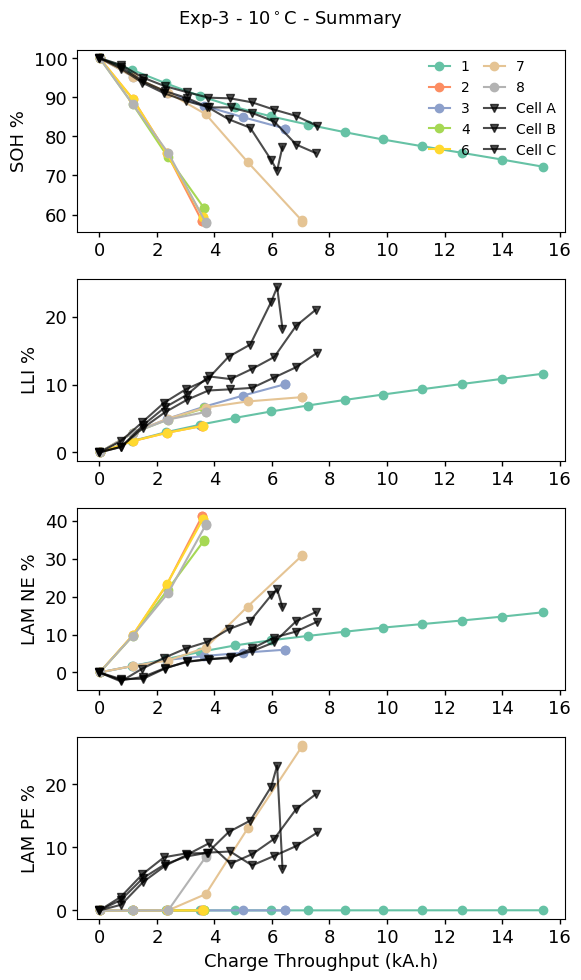

In [78]:
target = "Exp3_Scan0_6180cyc";index_exp=3;
Temper_i=10;Scans = np.arange(1,8+1,1).tolist() ; Scans.remove(5)
dpi=300;fs=13;Save=True;Plot_Exp=True;colormap='Set2'
Plot_CycRPT_Scans(
    GEM2_Round_230307,target,index_exp,Temper_i,Scans,
    BasicPath,colormap,fs,  dpi,Save,Plot_Exp)

Finish reading Experiment!


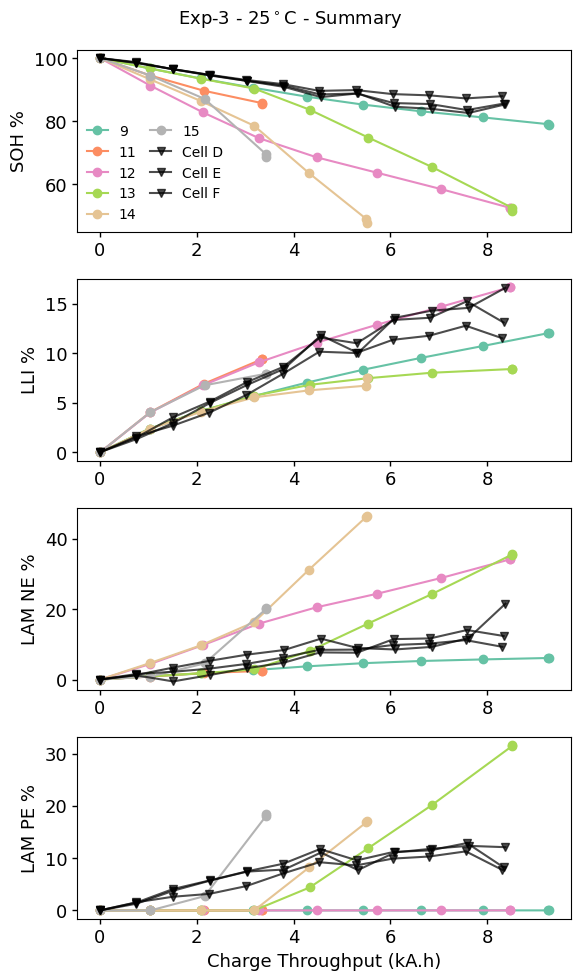

In [79]:
target = "Exp3_Scan0_6180cyc";index_exp=3;
Temper_i=25;Scans = np.arange(9,16+1,1).tolist() ; Scans.remove(10);Scans.remove(16)
dpi=300;fs=13;Save=True;Plot_Exp=True;colormap='Set2'
Plot_CycRPT_Scans(
    GEM2_Round_230307,target,index_exp,Temper_i,Scans,
    BasicPath,colormap,fs,  dpi,Save,Plot_Exp)

Finish reading Experiment!


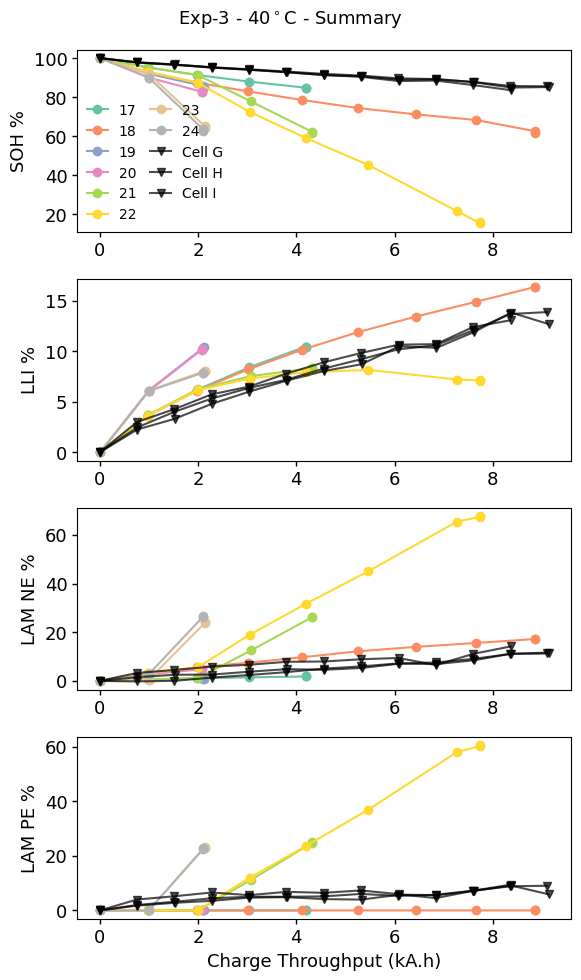

In [80]:
target = "Exp3_Scan0_6180cyc";index_exp=3;
Temper_i=40;Scans = np.arange(17,24+1,1).tolist() ; #Scans.remove(10);Scans.remove(16)
dpi=300;fs=13;Save=True;Plot_Exp=True;colormap='Set2'
Plot_CycRPT_Scans(
    GEM2_Round_230307,target,index_exp,Temper_i,Scans,
    BasicPath,colormap,fs,  dpi,Save,Plot_Exp)

Finish reading Experiment!


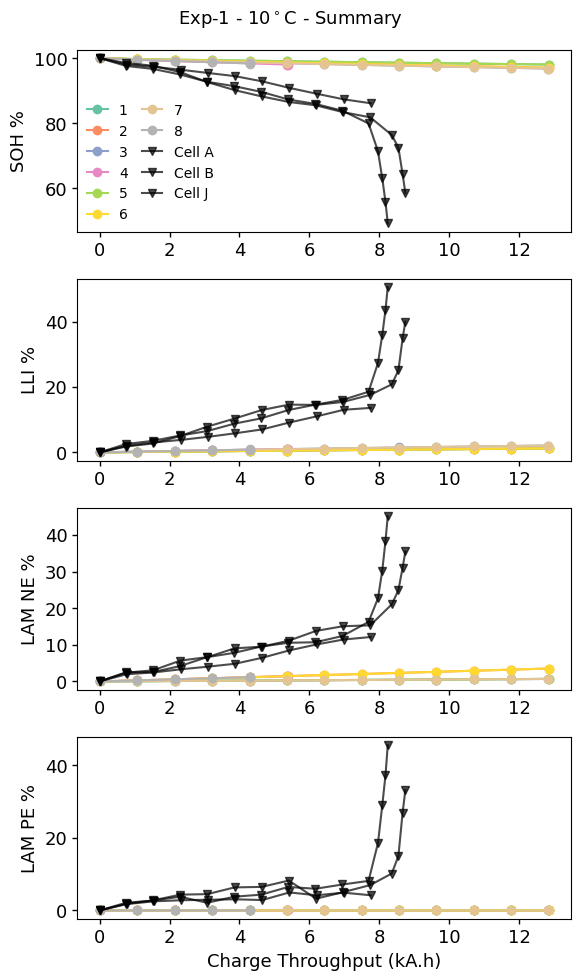

In [75]:
target = "Exp1_Scan0_LandsCon_3072";index_exp=1;
Temper_i=10;Scans = np.arange(1,8+1,1).tolist() ; #  Scans.remove(6)
dpi=300;fs=13;Save=True;Plot_Exp=True;colormap='Set2'
Plot_CycRPT_Scans(
    GEM2_Round_230307,target,index_exp,Temper_i,Scans,
    BasicPath,colormap,fs,  dpi,Save,Plot_Exp)

Finish reading Experiment!


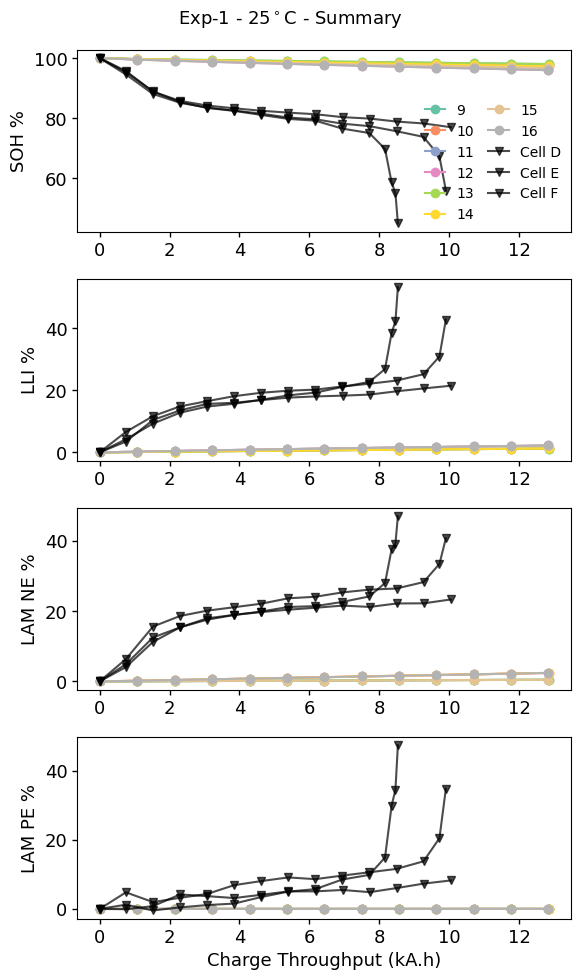

In [76]:
target = "Exp1_Scan0_LandsCon_3072";index_exp=1;
Temper_i=25;Scans = np.arange(9,16+1,1).tolist() ; #  Scans.remove(6)
dpi=300;fs=13;Save=True;Plot_Exp=True;colormap='Set2'
Plot_CycRPT_Scans(
    GEM2_Round_230307,target,index_exp,Temper_i,Scans,
    BasicPath,colormap,fs,  dpi,Save,Plot_Exp)

Finish reading Experiment!


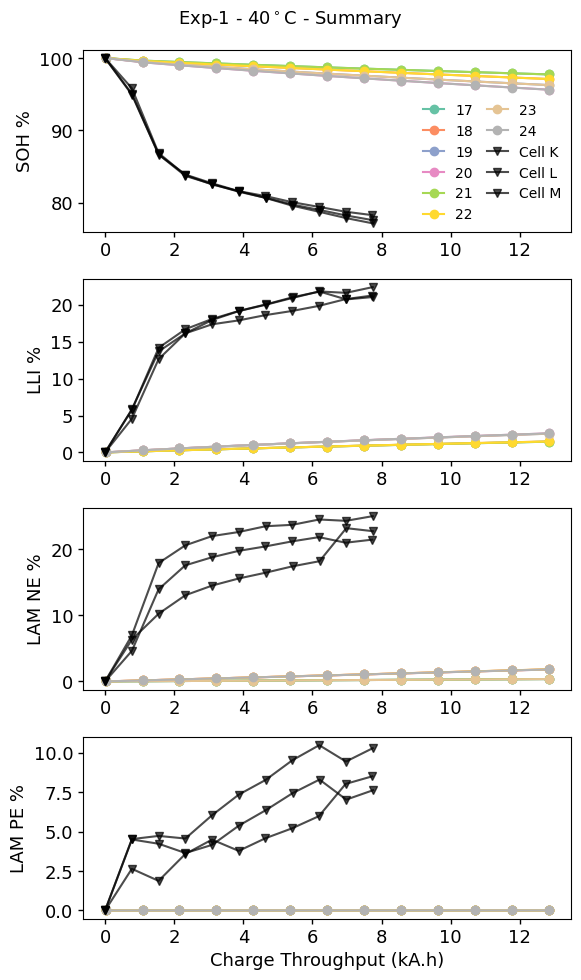

In [77]:
target = "Exp1_Scan0_LandsCon_3072";index_exp=1;
Temper_i=40;Scans = np.arange(17,24+1,1).tolist() ; #  Scans.remove(6)
dpi=300;fs=13;Save=True;Plot_Exp=True;colormap='Set2'
Plot_CycRPT_Scans(
    GEM2_Round_230307,target,index_exp,Temper_i,Scans,
    BasicPath,colormap,fs,  dpi,Save,Plot_Exp)

Finish reading Experiment!


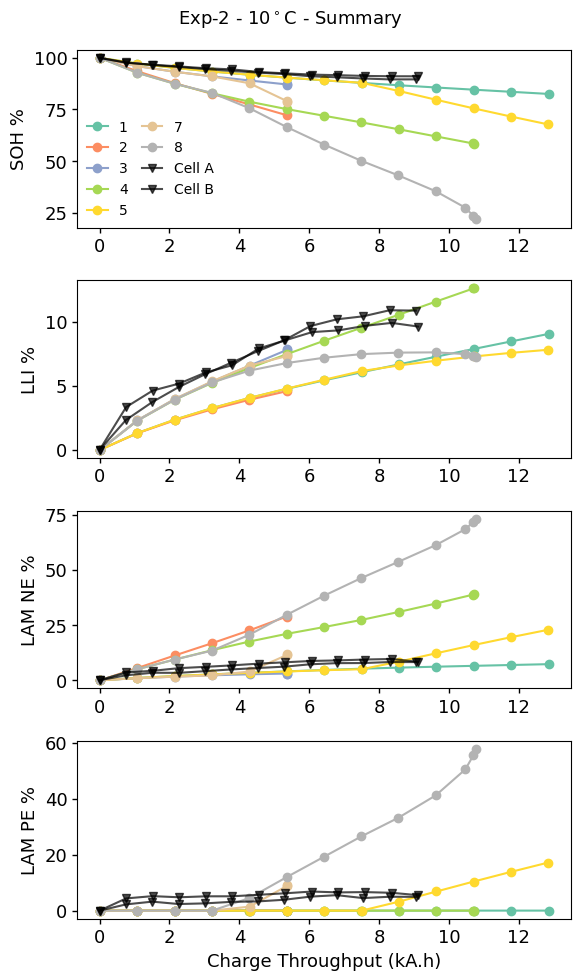

In [84]:
target = "Exp2_Scan0_6192cyc";index_exp=2;
Temper_i=10;Scans = np.arange(1,8+1,1).tolist() ; Scans.remove(6)
dpi=300;fs=13;Save=True;Plot_Exp=True;colormap='Set2'
Plot_CycRPT_Scans(
    GEM2_Round_230307,target,index_exp,Temper_i,Scans,
    BasicPath,colormap,fs,  dpi,Save,Plot_Exp)


Finish reading Experiment!


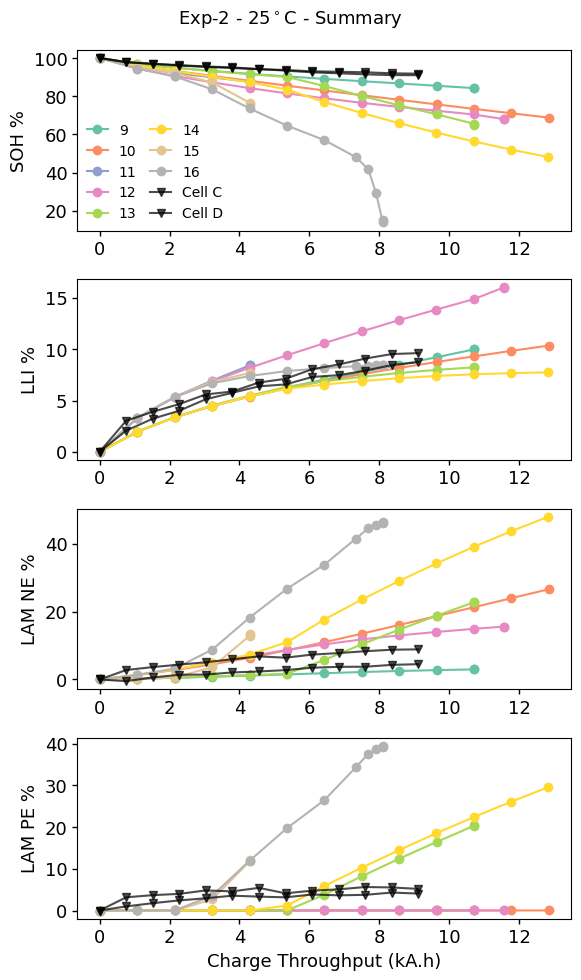

In [73]:
target = "Exp2_Scan0_6192cyc";index_exp=2;
Temper_i=25; Scans = np.arange(9,16+1,1).tolist() 
dpi=300;fs=13;Save=True;Plot_Exp=True;colormap='Set2'
Plot_CycRPT_Scans(
    GEM2_Round_230307,target,index_exp,Temper_i,Scans,
    BasicPath,colormap,fs,  dpi,Save,Plot_Exp)

Finish reading Experiment!


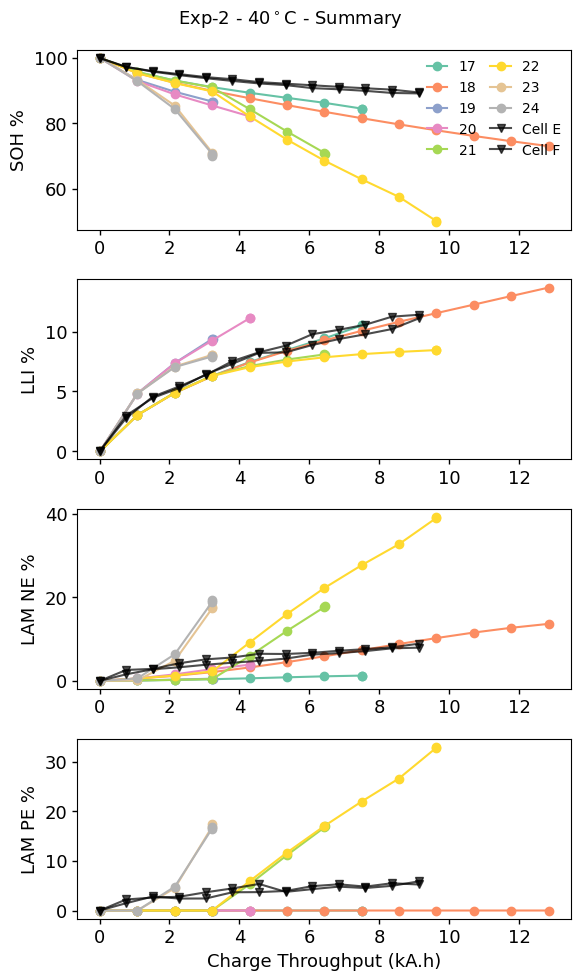

In [74]:
target = "Exp2_Scan0_6192cyc";index_exp=2;
Temper_i=40; Scans = np.arange(17,24+1,1).tolist() 
dpi=300;fs=13;Save=True;Plot_Exp=True;colormap='Set2'
Plot_CycRPT_Scans(
    GEM2_Round_230307,target,index_exp,Temper_i,Scans,
    BasicPath,colormap,fs,  dpi,Save,Plot_Exp)